## **File 5 : Deaths Per Month in 4 Years**

Importing the modules

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


Creating a Dataframe

In [2]:
df = pd.read_csv('final.csv')

Cleaning columns

In [3]:
df.drop(columns = ['Unnamed: 0.1','Unnamed: 0'],inplace=True)

Changing the Datatype to Datetime

In [4]:
df['date'] = pd.to_datetime(df['date'])

Creating a new Year_month columns

In [5]:
df['year_month'] = df['date'].dt.to_period('M')

In [6]:
df.to_csv('final2.csv')

In [7]:
df

,location,date,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,people_fully_vaccinated,population,year,year_month
0,United States,2020-01-05,0.0,0.0,0.0,0.0,NaN,NaN,338289856,NaN,2020-01
1,United States,2020-01-06,0.0,0.0,0.0,0.0,NaN,NaN,338289856,NaN,2020-01
2,United States,2020-01-07,0.0,0.0,0.0,0.0,NaN,NaN,338289856,NaN,2020-01
3,United States,2020-01-08,0.0,0.0,0.0,0.0,NaN,NaN,338289856,NaN,2020-01
4,United States,2020-01-09,0.0,0.0,0.0,0.0,NaN,NaN,338289856,NaN,2020-01
...,...,...,...,...,...,...,...,...,...,...,...
24790,China,2024-07-31,99371132.0,0.0,122289.0,0.0,NaN,NaN,1425887360,2024.0,2024-07
24791,China,2024-08-01,99371132.0,0.0,122289.0,0.0,NaN,NaN,1425887360,2024.0,2024-08
24792,China,2024-08-02,99371132.0,0.0,122289.0,0.0,NaN,NaN,1425887360,2024.0,2024-08
24793,China,2024-08-03,99371132.0,0.0,122289.0,0.0,NaN,NaN,1425887360,2024.0,2024-08


In [8]:
df['month_name'] = df['date'].dt.strftime('%b')

In [9]:
df_new_deaths = df.groupby('month_name').agg({
    'new_deaths':'sum'
})


In [10]:
df_new_deaths.reset_index(inplace = True)

Getting the month number from month name in order to arrange the months in sequence

In [11]:
df_new_deaths['month_no'] = pd.to_datetime(df_new_deaths['month_name'],format = '%b').dt.month

In [12]:
df_new_deaths.sort_values(by = 'month_no',inplace = True)


In [13]:
df_new_deaths.set_index('month_no')

,month_name,new_deaths
month_no,,
1,Jan,486827.0
2,Feb,419861.0
3,Mar,283489.0
4,Apr,359288.0
5,May,425453.0
6,Jun,255872.0
7,Jul,223912.0
8,Aug,288007.0
9,Sep,241343.0


In [14]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

**Plotting the Data**

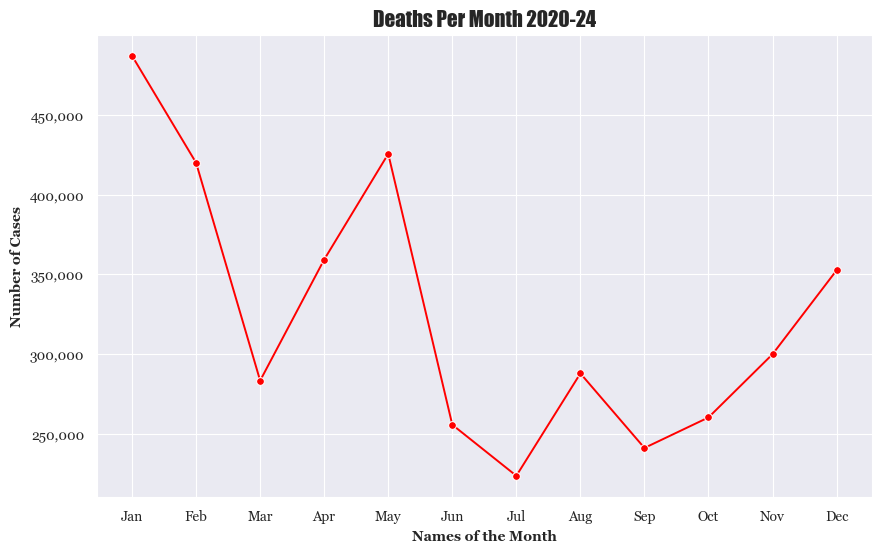

In [16]:
plt.style.use('seaborn-v0_8-paper')
plt.figure(figsize=(10,6))
sns.lineplot(data = df_new_deaths,x = 'month_name', y ='new_deaths',color = 'red',marker = 'o')
sns.set_style('darkgrid')
plt.title('Deaths Per Month 2020-24',fontsize = 15,fontfamily = 'fantasy')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x,_ :f'{int(x):,}'))
plt.xlabel('Names of the Month',fontsize = 10,fontweight = 'bold',fontfamily = 'Georgia')
plt.ylabel('Number of Cases',fontsize = 10,fontweight = 'bold',fontfamily = 'Georgia')
plt.xticks(fontsize = 10,fontfamily = 'Georgia')
plt.yticks(fontsize = 10,fontfamily = 'Georgia')
plt.show()